<a href="https://colab.research.google.com/github/Anantha-Rao12/IISER-Pune-India/blob/master/custom_cnn_delema_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 : Downaload the dataset and Unzip into two directories

In [1]:
!wget https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip

--2020-10-25 04:22:40--  https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip
Resolving ceb.nlm.nih.gov (ceb.nlm.nih.gov)... 130.14.52.15, 2607:f220:41e:7052::15
Connecting to ceb.nlm.nih.gov (ceb.nlm.nih.gov)|130.14.52.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353452851 (337M) [application/zip]
Saving to: ‘cell_images.zip’

cell_images.zip     100%[===================>] 337.08M  42.8MB/s    in 8.4s    

2020-10-25 04:22:49 (40.2 MB/s) - ‘cell_images.zip’ saved [353452851/353452851]



In [ ]:
!unzip cell_images.zip

In [4]:
!apt install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [5]:
# Show directory structure
!tree --dirsfirst --filelimit 10 /content/cell_images/

/content/cell_images/
├── Parasitized [13780 entries exceeds filelimit, not opening dir]
└── Uninfected [13780 entries exceeds filelimit, not opening dir]

2 directories, 0 files


In [6]:
#Tensorflow and Keras Utils 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

# Numpy for Matrix Manipulatons 
import numpy as np

# Matplotlib and Seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

# Sklearn for Model Utils
from sklearn.model_selection import train_test_split
print('Tensorflow Version:',tf.__version__)

Tensorflow Version: 2.3.0


# Step 2 : Data Preprocessing

In [7]:
data_directory = '/content/cell_images'
image_width = 64
image_height = 64
m = 27558

# Data Augmentation
datagen = ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,rescale=1/255.0)  

In [9]:
train_data_generator = datagen.flow_from_directory(directory='/content/cell_images', target_size=(image_width,image_height),
                                                   class_mode = 'binary', batch_size = m, shuffle=True, subset='training')
                            

# We use Data Generator to create a tensor dataset of all images form the given directories

Found 27558 images belonging to 2 classes.


In [10]:
X = train_data_generator[0][0]
Y = train_data_generator[0][1]

#  Here we separate the X and Y datasets from the Training data directories
print(X.shape)
print(Y.shape)

(27558, 64, 64, 3)
(27558,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
 
# We perform a 80/20 Train test Split of the Dataset

In [12]:
print(X_train.shape, y_train.shape) 
# use 80% data set for training

print(X_test.shape,y_test.shape) 
# use this data for testing final score

(22046, 64, 64, 3) (22046,)
(5512, 64, 64, 3) (5512,)


# Step 3 : Building the Model

In [30]:
def build_model(X_train, y_train, X_val, y_val,epochs): 

    # Inspired from LENET 5 Architecture
    
    model = Sequential()

    model.add(Conv2D(6, (5,5), activation = 'relu', input_shape = X_train.shape[1:]))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(BatchNormalization(axis = -1))
    model.add(Dropout(0.2))

    model.add(Conv2D(10, (5,5), activation = 'relu'))
    model.add(MaxPooling2D((2,2),strides=(1,1)))
    model.add(BatchNormalization(axis = -1))
    model.add(Dropout(0.2))

    model.add(Conv2D(16, (5,5), activation = 'relu'))
    model.add(MaxPooling2D((2,2),strides=(1,1)))
    model.add(BatchNormalization(axis = -1))
    model.add(Dropout(0.2))

    model.add(Flatten())

    model.add(Dense(120, activation = 'relu'))
    model.add(BatchNormalization(axis = -1))
    model.add(Dropout(0.5))

    model.add(Dense(84, activation = 'relu'))
    model.add(BatchNormalization(axis = -1))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation = 'relu'))
    model.add(BatchNormalization(axis = -1))

    model.add(Dense(1, activation = 'sigmoid'))

    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
                                initial_learning_rate=3e-4,
                                decay_steps=10000,
                                decay_rate=0.9)

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
              loss="binary_crossentropy",
              metrics=["accuracy"])

    model.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data = (X_val, y_val))

    return model

# Step 4 : Training the Model

In [44]:
results = build_model(X_train, y_train,X_test, y_test, 20)

Epoch 1/20
173/173 [==============================] - 3s 14ms/step - loss: 0.5636 - accuracy: 0.7135 - val_loss: 1.5220 - val_accuracy: 0.4973
Epoch 2/20
173/173 [==============================] - 2s 13ms/step - loss: 0.3061 - accuracy: 0.8806 - val_loss: 1.7351 - val_accuracy: 0.4978
Epoch 3/20
173/173 [==============================] - 2s 12ms/step - loss: 0.2396 - accuracy: 0.9136 - val_loss: 0.4858 - val_accuracy: 0.7981
Epoch 4/20
173/173 [==============================] - 2s 12ms/step - loss: 0.2091 - accuracy: 0.9289 - val_loss: 0.2688 - val_accuracy: 0.8926
Epoch 5/20
173/173 [==============================] - 2s 12ms/step - loss: 0.1990 - accuracy: 0.9333 - val_loss: 0.2237 - val_accuracy: 0.9040
Epoch 6/20
173/173 [==============================] - 2s 12ms/step - loss: 0.1868 - accuracy: 0.9384 - val_loss: 0.2229 - val_accuracy: 0.9227
Epoch 7/20
173/173 [==============================] - 2s 12ms/step - loss: 0.1788 - accuracy: 0.9413 - val_loss: 0.2025 - val_accuracy: 0.9202

# Step 5 : Checking Model Accuracy and Entropy Loss

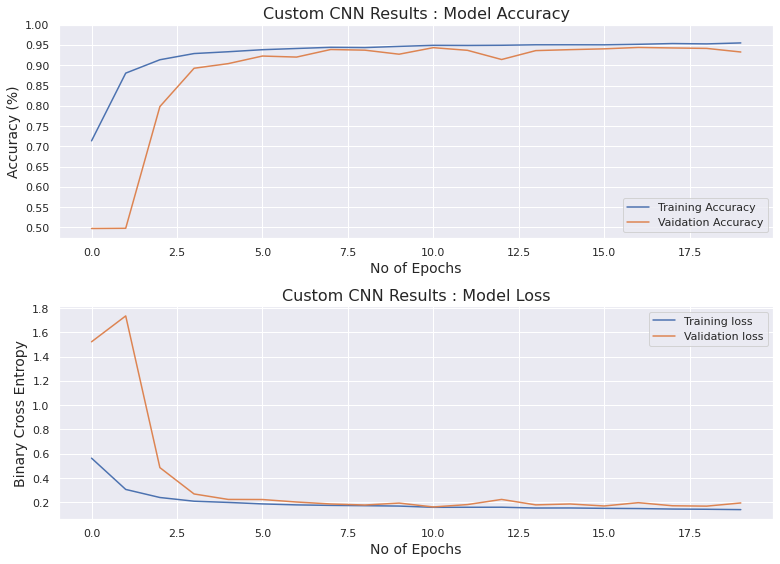

In [45]:
fig,axes = plt.subplots(nrows=2,ncols=1,figsize= (11,8))
#epochs = n_epochs
axes[0].plot(results.history.history['accuracy'],label='Training Accuracy')
axes[0].plot(results.history.history['val_accuracy'],label='Vaidation Accuracy')
axes[0].set_xlabel('No of Epochs',fontsize=14)
axes[0].set_ylabel('Accuracy (%)',fontsize=14)
axes[0].set_yticks(np.arange(0.5,1.01,0.05))
axes[0].legend()
axes[0].set_title('Custom CNN Results : Model Accuracy',fontsize=16)

axes[1].plot(results.history.history['loss'],label='Training loss')
axes[1].plot(results.history.history['val_loss'],label='Validation loss')
axes[1].set_xlabel('No of Epochs',fontsize=14)
axes[1].set_ylabel('Binary Cross Entropy',fontsize=14)
axes[1].set_title('Custom CNN Results : Model Loss',fontsize=16)
axes[1].legend()
#axes[1].set_yticks(np.arange(0.0,0.9,0.1))


plt.tight_layout()
plt.show()

In [ ]:
results.save('/content/drive/My Drive/DS-Python-notebooks/My-Projects/Malaria/custom_cnn_lenet_val_9539_oct_24_1100.h5')